# Principal Component Analysis

## import library

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [122]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print(feature.shape)

(50, 2)


## plot the input data

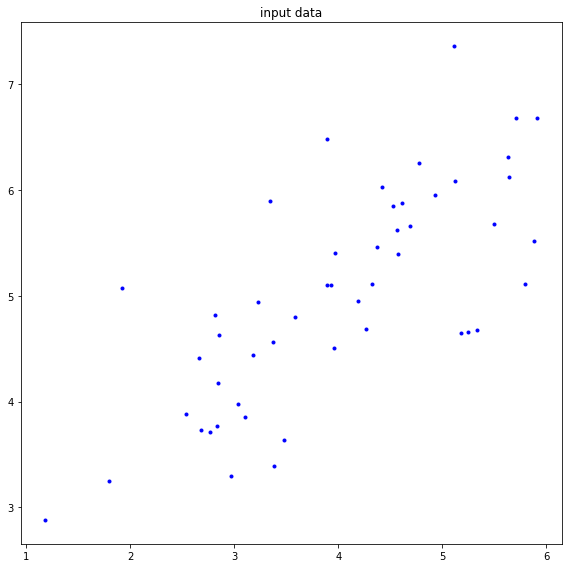

In [123]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, '.', color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

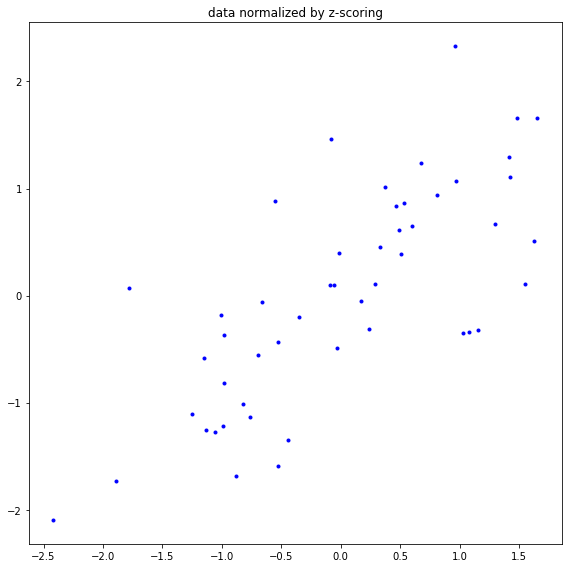

In [124]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

feature = (feature - feature.mean(axis = 0)) / feature.std(axis = 0)

x = feature[:,0]
y = feature[:,1]


plt.plot(x, y, '.', color = 'blue')

plt.tight_layout()
plt.show()

In [125]:
print(np.mean(feature[:,0]))
print(np.mean(feature[:,1]))
print(np.std(feature[:,0]))
print(np.std(feature[:,1]))

1.0014211682118912e-15
3.8635761256955447e-16
0.9999999999999998
0.9999999999999999


## compute covariance matrix

In [126]:
def compute_covariance(feature):
    
    Sigma = np.cov(feature.T)
    
    return Sigma

In [127]:
print(feature.shape)
XX = compute_covariance(feature)
print(XX)

(50, 2)
[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]


## compute principal directions

In [128]:
def compute_eigen(X):
    
    eigen_val, eigen_vec = np.linalg.eig(X)
    
    value = eigen_val
    vector = eigen_vec
    
    return value, vector

In [129]:
compute_eigen(XX)

(array([1.77094898, 0.26986734]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

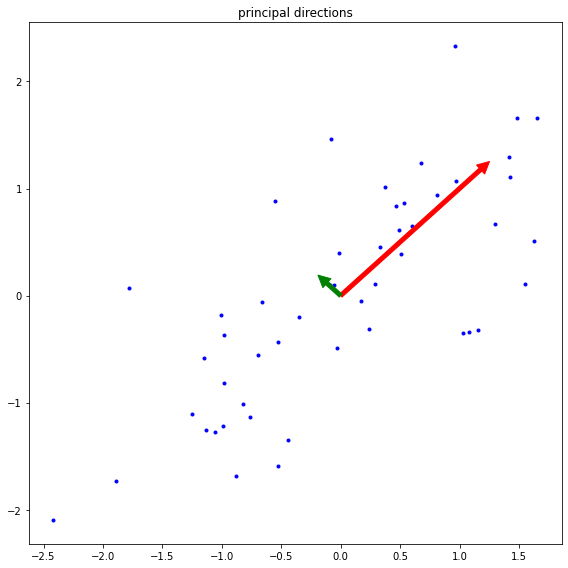

In [130]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

plt.plot(x, y, '.', color = 'blue')

eigen_val,eigen_vec = compute_eigen(XX)

eigen_vec.reshape(2,2)

eig_vec1 = eigen_vec[:,0] * eigen_val[0]
eig_vec2 = eigen_vec[:,1] * eigen_val[1]

plt.annotate('', xy = (eig_vec1), xytext = (0,0), arrowprops = {'color':'red'})
plt.annotate('', xy = (eig_vec2), xytext = (0,0), arrowprops = {'color':'green'} )


plt.tight_layout()
plt.show()

## first principal axis

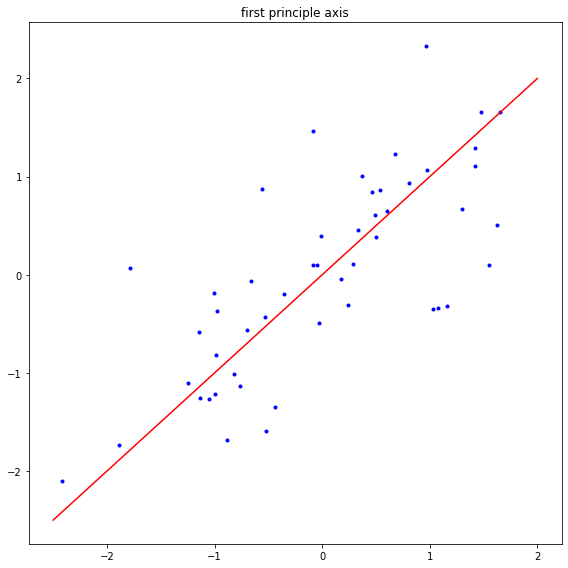

In [133]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

plt.tight_layout()
plt.show()

## second principal axis

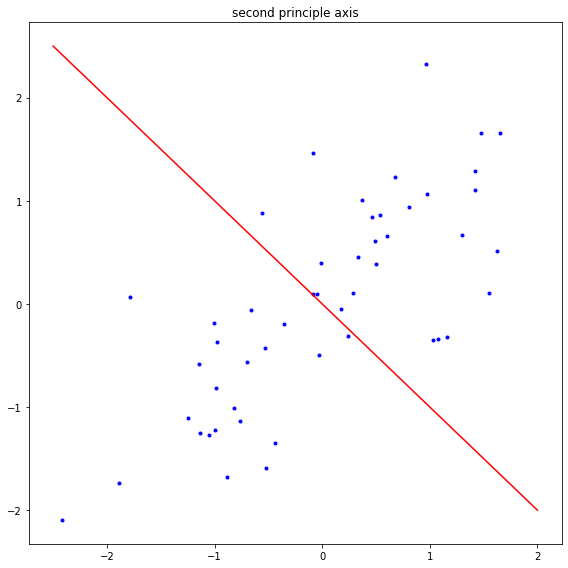

In [94]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

plt.plot(xx,yy,'-',color = 'red')

plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [95]:
def compute_projection_onto_line(feature, vector):
    
    n = feature.shape[0]
    
    temp = feature.dot(vector).reshape(50,1)
    
    revec = vector.reshape(1,2)
    
    projection = temp.dot(revec)
    
    return projection

## projcet to the first principal axis

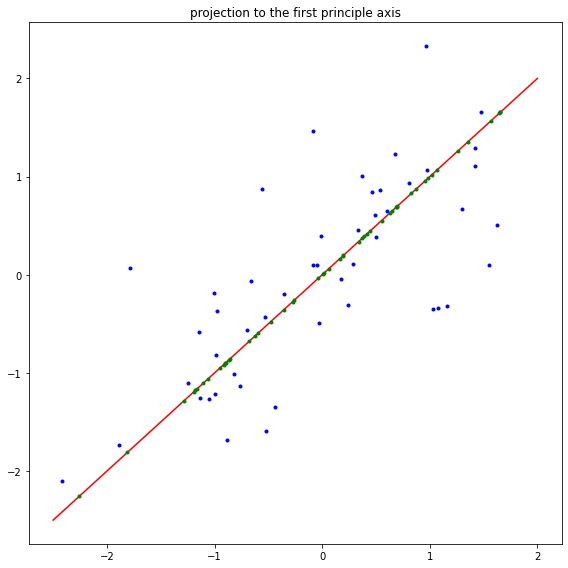

In [117]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

projection = compute_projection_onto_line(feature, eigen_vec[:,0])

plt.plot(projection[:,0],projection[:,1], '.', color = 'green')

plt.tight_layout()
plt.show()

In [118]:
def plot_first_project(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(x, y, '.', color = 'blue')
    
    n = feature.shape[0]
    xx = np.linspace(-2.5, 2, n)
    yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

    plt.plot(xx,yy,'-',color = 'red')

    projection = compute_projection_onto_line(feature, eigen_vec[:,1])

    plt.plot(projection[:,0],projection[:,1], '.', color = 'green')

    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

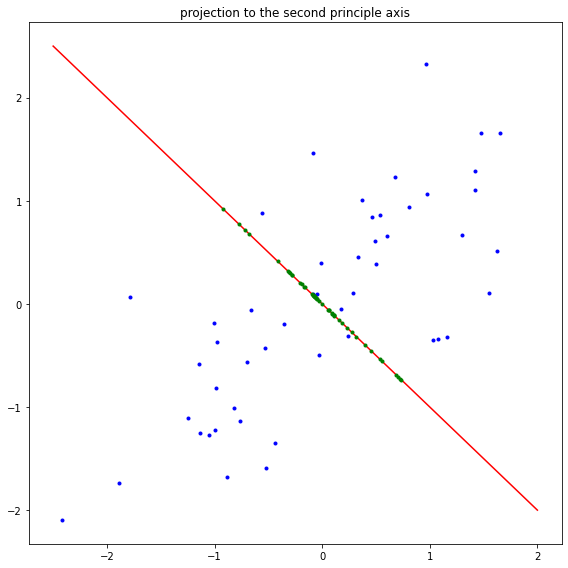

In [119]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

plt.plot(xx,yy,'-',color = 'red')

projection = compute_projection_onto_line(feature, eigen_vec[:,1])

plt.plot(L[:,0],L[:,1], '.', color = 'green')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

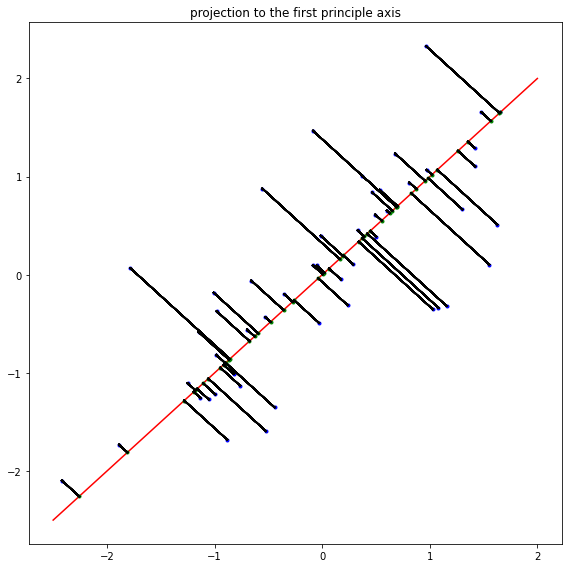

In [120]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

projectedX1 = feature.dot(eigen_vec[:,0]).reshape(50,1)

k = eigen_vec[:,0].reshape(1,2)
L = projectedX1.dot(k) 


plt.plot(L[:,0],L[:,1], '.', color = 'green')

XX = [feature[:,0], L[:,0]]
YY = [feature[:,1], L[:,1]] 

for i in range(n):
    plt.plot(XX,YY, '-', color = 'black')

    
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

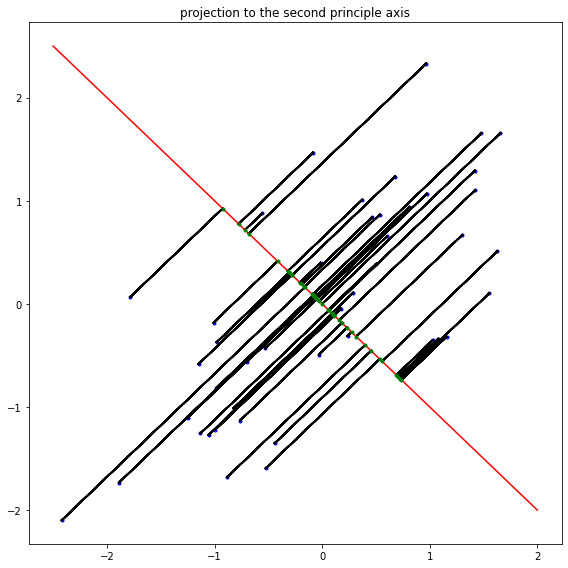

In [100]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx



projectedX2 = feature.dot(eigen_vec[:,1]).reshape(50,1)

k = eigen_vec[:,1].reshape(1,2)
L = projectedX2.dot(k) 


XX = [feature[:,0], L[:,0]]
YY = [feature[:,1], L[:,1]] 

for i in range(n):
    plt.plot(XX,YY, '-', color = 'black')

plt.plot(xx,yy,'-',color = 'red')
    
plt.plot(L[:,0],L[:,1], '.', color = 'green')

plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

In [101]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')

    plt.tight_layout()
    plt.show()

In [102]:
def plot_direction(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')
    
    cov_feature =  compute_covariance(feature)

    eigen_val,eigen_vec = compute_eigen(cov_feature)

    eigen_vec.reshape(2,2)

    eig_vec1 = eigen_vec[:,0] * eigen_val[0]
    eig_vec2 = eigen_vec[:,1] * eigen_val[1]

    plt.annotate('', xy = (eig_vec1), xytext = (0,0), arrowprops = {'color':'red'})
    plt.annotate('', xy = (eig_vec2), xytext = (0,0), arrowprops = {'color':'green'} )

    plt.tight_layout()
    plt.show()

In [103]:
def plot_first_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')

    cov_feature =  compute_covariance(feature)

    eigen_val,eigen_vec = compute_eigen(cov_feature)

    eigen_vec.reshape(2,2)

    xx = np.linspace(-2.5, 2, 50)
    yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

    plt.plot(xx,yy,'-',color = 'red')

    plt.tight_layout()
    plt.show()

In [104]:
def plot_second_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')

    cov_feature =  compute_covariance(feature)

    eigen_val,eigen_vec = compute_eigen(cov_feature)

    eigen_vec.reshape(2,2)

    xx = np.linspace(-2.5, 2, 50)
    yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

    plt.plot(xx,yy,'-',color = 'red')

    plt.tight_layout()
    plt.show()

In [112]:
def plot_first_project(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(x, y, '.', color = 'blue')
    
    n = feature.shape[0]
    
    cov_feature =  compute_covariance(feature)

    eigen_val,eigen_vec = compute_eigen(cov_feature)

    eigen_vec.reshape(2,2)
    
    xx = np.linspace(-2.5, 2, n)
    yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

    plt.plot(xx,yy,'-',color = 'red')

    projection = compute_projection_onto_line(feature, eigen_vec[:,0])

    plt.plot(projection[:,0],projection[:,1], '.', color = 'green')

    plt.tight_layout()
    plt.show()

In [114]:
def plot_second_project(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.plot(x, y, '.', color = 'blue')
    
    n = feature.shape[0]
    
    cov_feature =  compute_covariance(feature)

    eigen_val,eigen_vec = compute_eigen(cov_feature)

    eigen_vec.reshape(2,2)
    
    xx = np.linspace(-2.5, 2, n)
    yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

    plt.plot(xx,yy,'-',color = 'red')

    projection = compute_projection_onto_line(feature, eigen_vec[:,1])

    plt.plot(projection[:,0],projection[:,1], '.', color = 'green')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_connect_data(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    n = feature.shape[0]
    xx = np.linspace(-2.5, 2, n)
    yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

    projectedX1 = feature.dot(eigen_vec[:,0]).reshape(50,1)

    k = eigen_vec[:,0].reshape(1,2)
    L = projectedX1.dot(k) 


   

    x_line = [feature[:,0], L[:,0]]
    y_line = [feature[:,1], L[:,1]] 

    for i in range(n):
    plt.plot(x_line,y_line, '-', color = 'black')

    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')
    plt.plot(xx,yy,'-',color = 'red')
    plt.plot(L[:,0],L[:,1], '.', color = 'green')
    
    plt.tight_layout()
    plt.show()

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

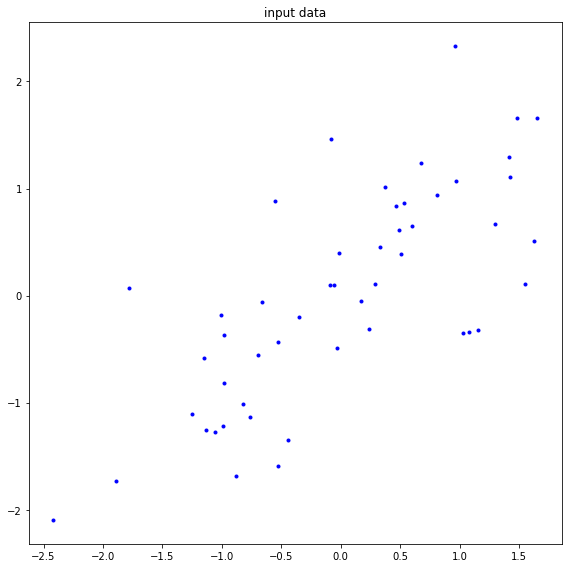

In [105]:
plot_data(feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

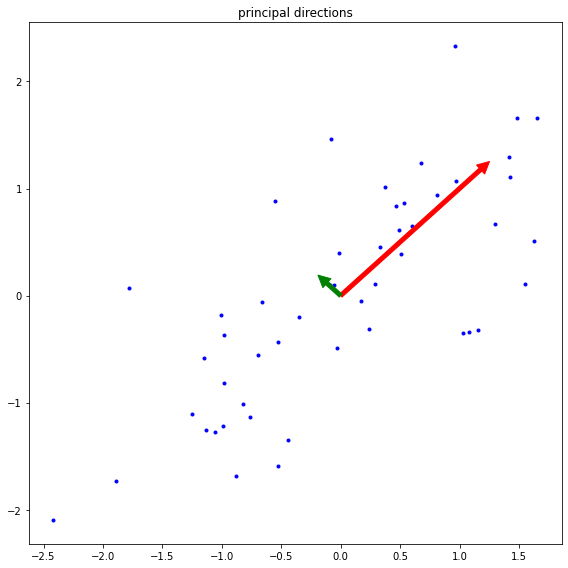

In [106]:
plot_direction(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

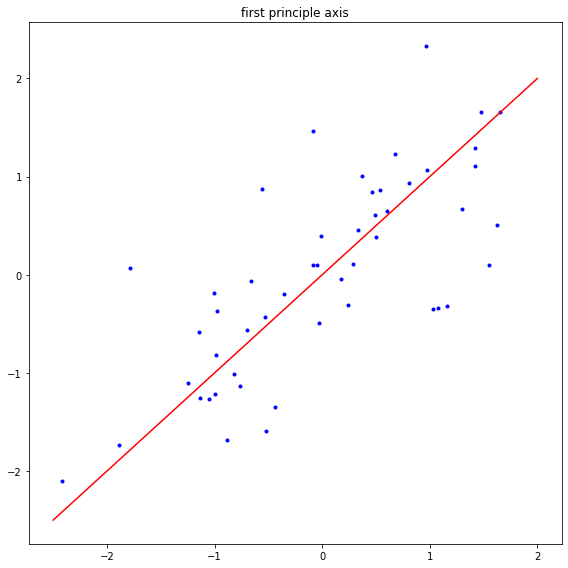

In [107]:
plot_first_axis(feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

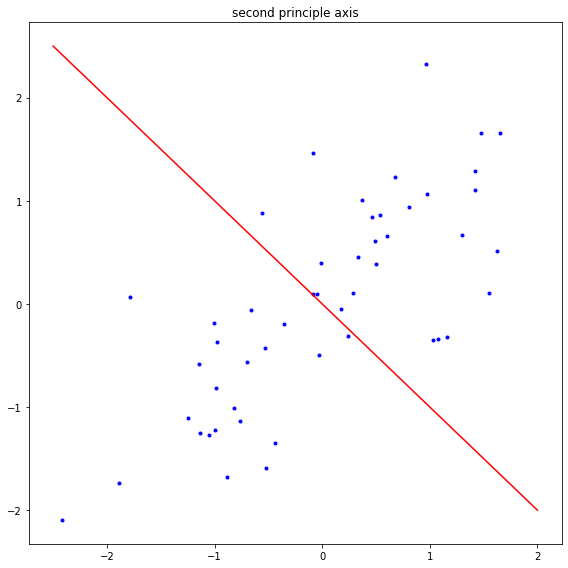

In [109]:
plot_second_axis(feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

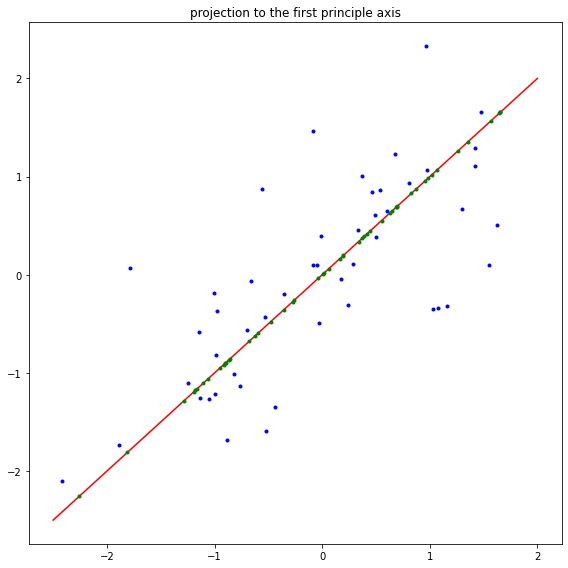

In [113]:
plot_first_project(feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

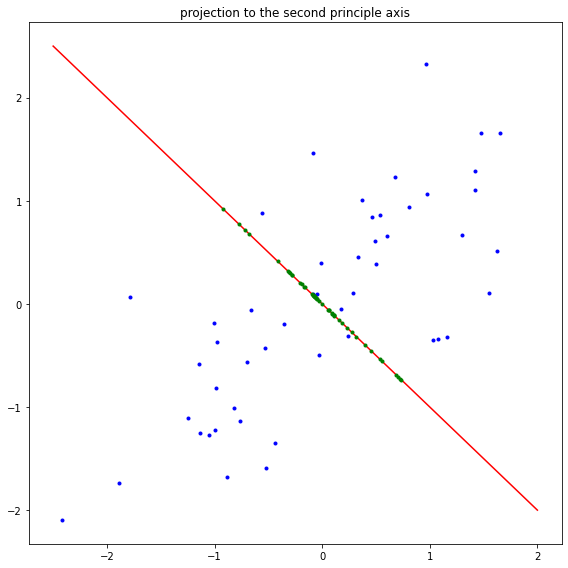

In [115]:
plot_second_project(feature)

***

### 7. plot the projection line in grey onto the first principal axis

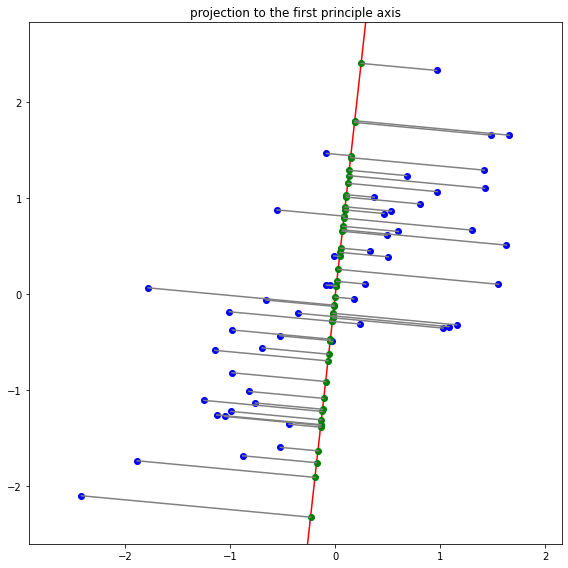

***

### 8. plot the projection line in grey onto the second principal axis

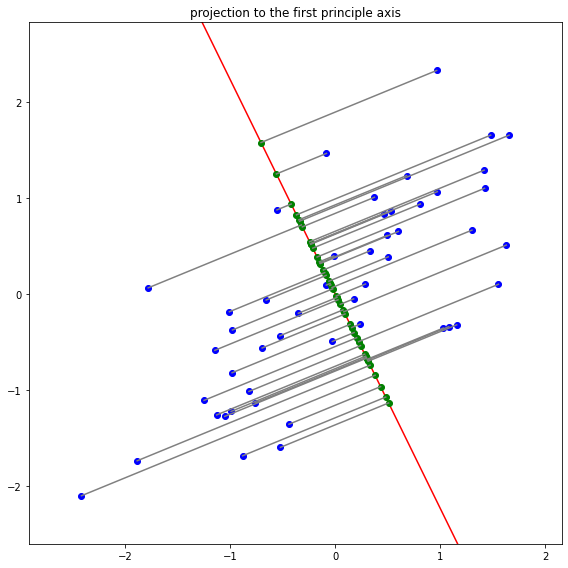

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***